In [0]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [0]:
#load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print(x_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [0]:
#cnn expects 3 dimensional HxWxC - height, width, color
#the data however, is only 2D
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [0]:
#number of class
k = len(set(y_train))
print("number of class",k)

number of class 10


In [0]:
#building model using keras functional api
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3), strides=2, activation="relu", )(i)
x = Conv2D(64, (3,3), strides=2, activation="relu")(x)
x = Conv2D(128, (3,3), strides=2, activation="relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(k, activation="softmax")(x)

model = Model(i, x)

In [0]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 14s 235us/sample - loss: 0.5229 - accuracy: 0.8070 - val_loss: 0.3980 - val_accuracy: 0.8496
Epoch 2/15
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3664 - accuracy: 0.8620 - val_loss: 0.3611 - val_accuracy: 0.8647
Epoch 3/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.3188 - accuracy: 0.8802 - val_loss: 0.3327 - val_accuracy: 0.8760
Epoch 4/15
60000/60000 [==============================] - 6s 104us/sample - loss: 0.2828 - accuracy: 0.8931 - val_loss: 0.3193 - val_accuracy: 0.8822
Epoch 5/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2569 - accuracy: 0.9023 - val_loss: 0.2999 - val_accuracy: 0.8922
Epoch 6/15
60000/60000 [==============================] - 6s 107us/sample - loss: 0.2347 - accuracy: 0.9112 - val_loss: 0.2921 - val_accuracy: 0.8954
Epoch 7/15
60000/60000 [=========================

In [0]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="train loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

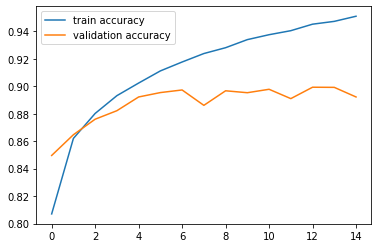

In [0]:
plt.plot(r.history["accuracy"], label="train accuracy")
plt.plot(r.history["val_accuracy"], label="validation accuracy")
plt.legend()
plt.show()

Confusion matrix, without normalization
[[856   2  17  23   4   4  89   0   5   0]
 [  1 980   2  11   1   0   3   0   2   0]
 [ 20   1 787   9  83   1  99   0   0   0]
 [ 13  24  16 862  41   0  43   0   1   0]
 [  0   1  36  17 863   0  83   0   0   0]
 [  0   0   0   0   0 979   0  15   0   6]
 [117   3  47  22 101   1 705   0   4   0]
 [  0   0   0   0   0  15   0 964   0  21]
 [  0   0   2   3   6   4  11   5 969   0]
 [  1   0   0   0   0   9   0  32   1 957]]


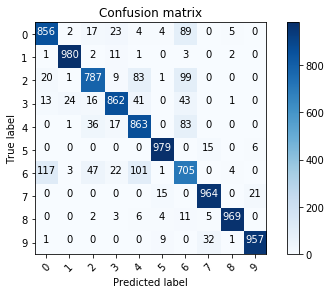

In [0]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

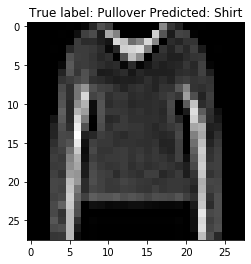

In [0]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));